# 04ISFOV - COMPUTER VISION

## Trasformata di Fourier

_Lo scopo di questa esercitazione è quello di realizzare vari tipi di filtri (passa basso, passa alto e passa banda) su alcune immagini, utilizzando la trasformata di Fourier._

## Esercizio 1

_Aiutandosi con quanto realizzato per l’esercizio della scorsa settimana, utilizzare le funzioni di OpenCV per calcolare la trasformata (discreta) di Fourier di un’immagine a scelta. Creare poi un filtro passa alto da applicare come maschera al risultato dell’operazione di trasformazione. Per realizzare un filtro passa alto, creare una maschera di 1 grande come l’immagine, al cui centro si trova un cerchio, di raggio a scelta, la cui area ha tutti i valori a 0. 
Dopo aver applicato la maschera sull’immagine trasformata, anti-trasformare l’immagine risultante. <br/> Visualizzare tutti i passaggi effettuati (immagine originale, sua trasformata, sua trasformata con filtro applicato, anti-trasformata), controllando che i risultati siano corretti._

### Pacchetti da importare

In [1]:
%matplotlib inline
%pylab inline 
from ipywidgets import interact
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import sys
import warnings

Populating the interactive namespace from numpy and matplotlib


### Ignorare i warnings

In [2]:
#per ignorare dei warning del secondo e terzo esercizio
if not sys.warnoptions:
    warnings.simplefilter("ignore")
#ingrandire i plot

### Lettura immagine e Trasformata

In [3]:
img = cv.imread("images/caleidoscopio.jpg", 0)
dft = cv.dft(np.float32(img), flags= cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# magnitude della trasformata non filtrata
magnitude_trasformata = 20*np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

### Creazione maschera con tutti 1 e un cerchio con soli zeri

In [4]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
# 2 sta per i canali
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow,ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
# permetteva di avere un filtro a quadrato
#mask[crow-30:crow+30, ccol-30:ccol+30] = 0

### Applicazione maschera alla zona filtrata
In seguito la parte di codice per la visualizzazione delle immagini trasformate

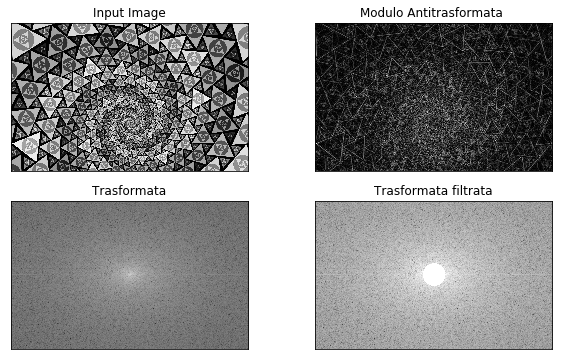

In [5]:
# trasformata  con filtro applicato per stamparla va calcolata la magnitudine
fshift = dft_shift*mask
# magnitude della trasformata filtrata
magnitude_trasformata_filtro = 20*np.log(cv.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
# img_back e' antitrasformata
img_back = cv.idft(f_ishift)

#aumentare grandezza plot
plt.rcParams['figure.figsize'] = (10,6)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:,:,1])
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_back, cmap='gray')
plt.title('Modulo Antitrasformata '), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(magnitude_trasformata, cmap='gray')
plt.title('Trasformata'), \
# toglie gli assi
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(magnitude_trasformata_filtro, cmap='gray')
plt.title('Trasformata filtrata'), plt.xticks([]), plt.yticks([])

plt.show()

## Esercizio 2

_Ripetere l’esercizio precedente, creando questa volta **un filtro passa basso** da utilizzare come maschera dell’immagine trasformata con Fourier. Per realizzare un filtro passa basso, creare una maschera di zeri con al centro un cerchio, di raggio a scelta, la cui area ha tutti i valori a 1.<br/> Come prima, visualizzare tutti i passaggi effettuati, controllando che i risultati siano corretti._

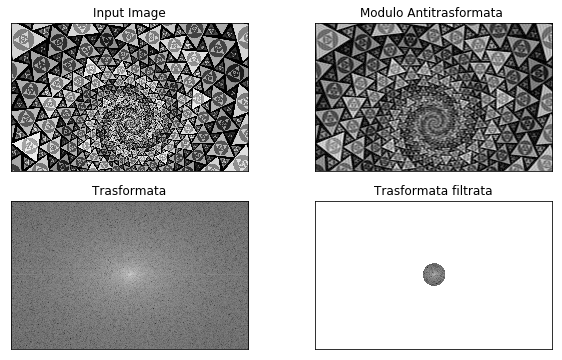

In [6]:
img = cv.imread("images/caleidoscopio.jpg", 0)
dft = cv.dft(np.float32(img), flags= cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# magnitude della trasformata non filtrata
modulo_trasformata = 20*np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
# crea una maschera con tutti 0 e un cerchio con soli uno
# 2 sta per i canali
mask = np.zeros((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# applico la maschera alla zona filtrata
# trasformata  con filtro applicato per stamparla va calcolata il modulo
fshift = dft_shift*mask
# magnitude della trasformata filtrata
# il log mi da quest' errore:  modulo_trasformata_filtro = 20*np.log(cv.magnitude(fshift[:, :, 0], fshift[:, :, 1]) ma funziona
modulo_trasformata_filtro = 20*np.log(cv.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


f_ishift = np.fft.ifftshift(fshift)
# img_back e' antitrasformata
img_back = cv.idft(f_ishift)

#aumentare grandezza plot
plt.rcParams['figure.figsize'] = (10,6)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:,:,1])
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_back, cmap='gray')
plt.title('Modulo Antitrasformata '), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(modulo_trasformata, cmap='gray')
plt.title('Trasformata'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(modulo_trasformata_filtro, cmap='gray')
plt.title('Trasformata filtrata'), plt.xticks([]), plt.yticks([])

plt.show()

## Esercizio 3

_Ripetere l’esercizio precedente, creando **un filtro passa banda** da utilizzare come maschera dell’immagine trasformata con Fourier. Per realizzare un filtro passa banda, creare una maschera di zeri con al centro due cerchi concentri, di raggio a scelta, i cui soli punti nell’anello esterno sono a 1. Come prima, visualizzare tutti i passaggi effettuati, controllando che i risultati siano corretti.<br/> Cosa succede all’immagine antitrasformata se si applica un discreto quantitativo di sfocatura (blur) alla maschera?_ 

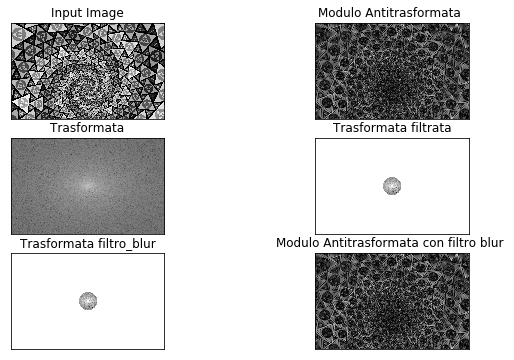

In [7]:
img = cv.imread("images/caleidoscopio.jpg", 0)
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# magnitude della trasformata non filtrata
modulo_trasformata = 20*np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
# crea una maschera con tutti 0 e un cerchio con soli uno
# 2 sta per i canali
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
primo_cerchio = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[primo_cerchio] = 1
r2 = 10
secondo_cerchio = (x - center[0]) ** 2 + (y -center[1]) ** 2 <= r2*r2
mask[secondo_cerchio] = 0
# if we wanted to do
blur = cv.blur(mask, (5, 5))
#bisogna sostituirlo a mask, praticamente la sfoca in modo che non ci sia
#un netto passaggio dal nero al bianco


# applico la maschera alla zona filtrata
# trasformata  con filtro applicato per stamparla va calcolata il modulo
fshift = dft_shift*mask
fshift_blur = dft_shift*blur
# magnitude della trasformata filtrata
# il log mi da quest' errore:  
# modulo_trasformata_filtro = 20*np.log(cv.magnitude(fshift[:, :, 0], fshift[:, :, 1]) ma funziona
#il warning che ho voluto ignorare con il codice all'inizio
modulo_trasformata_filtro = 2000*np.log(cv.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
modulo_trasformata_filtro_blur = 2000*np.log(cv.magnitude(fshift_blur[:, :, 0], fshift_blur[:, :, 1]))

#aumentare grandezza plot
plt.rcParams['figure.figsize'] = (10,6)

f_ishift = np.fft.ifftshift(fshift)
f_ishift_blur = np.fft.ifftshift(fshift_blur)
# img_back e' antitrasformata
img_back = cv.idft(f_ishift)
img_back_blur = cv.idft(f_ishift_blur)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
img_back_blur = cv.magnitude(img_back_blur[:, :, 0], img_back_blur[:, :, 1])
plt.subplot(321), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(img_back, cmap='gray')
plt.title('Modulo Antitrasformata '), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(modulo_trasformata, cmap='gray')
plt.title('Trasformata'), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(modulo_trasformata_filtro, cmap='gray')
plt.title('Trasformata filtrata'), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(modulo_trasformata_filtro_blur, cmap='gray')
plt.title('Trasformata filtro_blur'), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(img_back_blur, cmap='gray')
plt.title('Modulo Antitrasformata con filtro blur '), plt.xticks([]), plt.yticks([])
plt.show()


### Link utili

Tutorial sulla trasformata di Fourier: https://docs.opencv.org/3.4.3/de/dbc/tutorial_py_fourier_transform.html<br/>
Edge detection in images using Fourier Transform: https://akshaysin.github.io/fourier_transform.html<br/>
Better Edge detection and Noise reduction in images using Fourier Transform: https://akshaysin.github.io/fourier_lpf.html<br/>
Documentazione OpenCV in Python: https://madebyollin.github.io/opencv-python-docs/<br/>